In [2]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

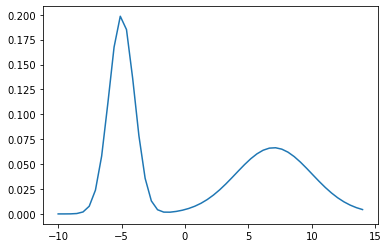

In [17]:
x = np.linspace(-10, 14, num = 50)

def mixture_pdf(x, pi, mu1, sigma1, mu2, sigma2):
    return norm.pdf(x, loc=mu1, scale=sigma1)*pi + norm.pdf(x, loc = mu2, scale=sigma2)*(1-pi)

y = mixture_pdf(x, pi=.5, mu1=-5, sigma1=1, mu2=7, sigma2=3)

plt.plot(x, y)
plt.show()

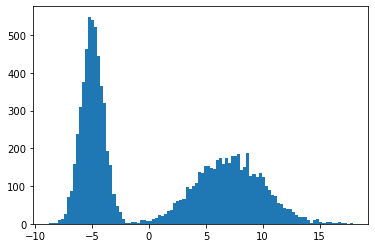

In [4]:
def sample_mix_normals(pi, mu1, sigma1, mu2, sigma2, n):
    rval=[]
    for i in range(n):
        if np.random.uniform(size=1) < pi:
            rval.append(np.random.normal(mu1, sigma1, 1)[0])
        else:
            rval.append(np.random.normal(mu2, sigma2, 1)[0])
    return np.asarray(rval)

sample = sample_mix_normals(pi=.5, mu1=-5, sigma1=1, mu2=7, sigma2=3, n=10000)

plt.hist(sample, bins=100)
plt.show()

## Writing code for sampling from a given PDF

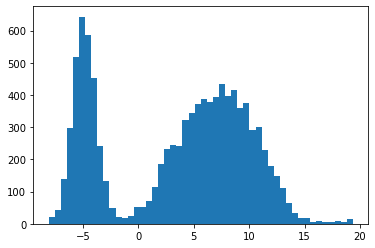

In [23]:
np.random.seed(123)

def metropolis__normal_sample(pdf, y0, n_iter):
    result = np.zeros((n_iter))
    accepted = np.zeros_like(result)
    result[0] = y0
    for i in range (1, n_iter):
        y_ = np.random.normal(loc=result[i-1], size=1)
        metropolis_ratio = pdf(y_)/pdf(result[i-1])
        acceptance = np.random.binomial(1, min(metropolis_ratio, 1), 1)
        if acceptance:
            result[i] = y_
            accepted[i] = 1
        else:
            result[i] = result[i-1]
    
    return {
        'y': result,
        'accepted': accepted[1:]
    }

results = metropolis__normal_sample(lambda x: mixture_pdf(x, pi=.5, mu1=-5, sigma1=1, mu2=7, sigma2=3), -1, 10000)

plt.hist(results['y'], bins=50)
plt.show()

Interested in following this example: https://kylekizirian.github.io/random-walk-matplotlib.html